<a href="https://colab.research.google.com/github/arthurnamz/Neural-Network/blob/main/%5BCODATA_RDA_datatrieste%5D_Perceptron_OR_rlang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The OR logic gate Problem

I this example we will train a neural network that is capable of learning the [OR function](https://en.wikipedia.org/wiki/Logical_disjunction) also known as the logical disjunction function.

#Install keras  

The [Keras framework](https://keras.rstudio.com/) has been implemented inside the Google Tensorflow API on version 2.0. The Keras framework takes advantage of the optimizations for GPU and also TPU.
The Google Colab Kernel already comes with one of the latest tensorflow implementations so we don't need to install it.

In [1]:
install.packages("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




# Load the needed libraries

For this example we will onle use the Keras library

In [2]:
library(keras)

# Prepare dataset

The dataset we will use is just a series of row binds:

In [3]:
l1 = c(0,0,0)
l2 = c(0,1,1)
l3 = c(1,0,1)
l4 = c(1,1,1)

or_truth_table = rbind(l1,l2,l3,l4)

Now let's check how it looks like. Just keep in mind that our target variable is at the 3rd column.

In [4]:
print(or_truth_table)

   [,1] [,2] [,3]
l1    0    0    0
l2    0    1    1
l3    1    0    1
l4    1    1    1


Now we will separate what are our features from our target or dependant variable.

In [5]:
train_x = or_truth_table[,c(1,2)]
train_y = or_truth_table[,3]
print(train_x)
print(train_y)

   [,1] [,2]
l1    0    0
l2    0    1
l3    1    0
l4    1    1
l1 l2 l3 l4 
 0  1  1  1 


# Create a sequential Neural Network model

We will use a very simple feed-forward Neural Network for our examples.

In [6]:
# Instantiate the model
model <- keras_model_sequential()

Loaded Tensorflow version 2.8.2



Our network will have the following architecture: 

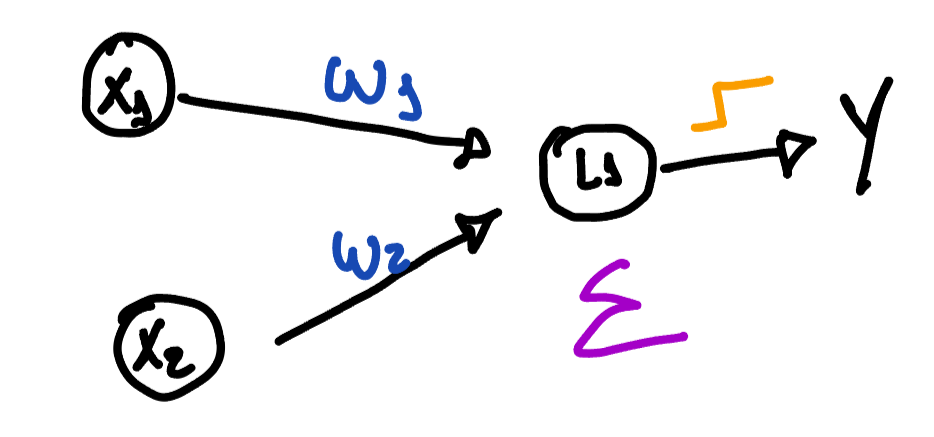

In [7]:
model <- model %>% layer_dense(units=1, input_shape=c(2))

Now we will use the `compile()` function to build the computational graph for our neural network. 

In [8]:
model %>% compile(loss = "mean_squared_error", optimizer = "sgd")

Now that the graph has been built we can start with the training.

In [9]:
history <- model %>% fit(x = train_x, y = train_y, epochs = 200)

Ploting the result of the training is very important to check how the learning function behaved over the epochs. In the graph, the blue line is the smooth representation of the learning error.

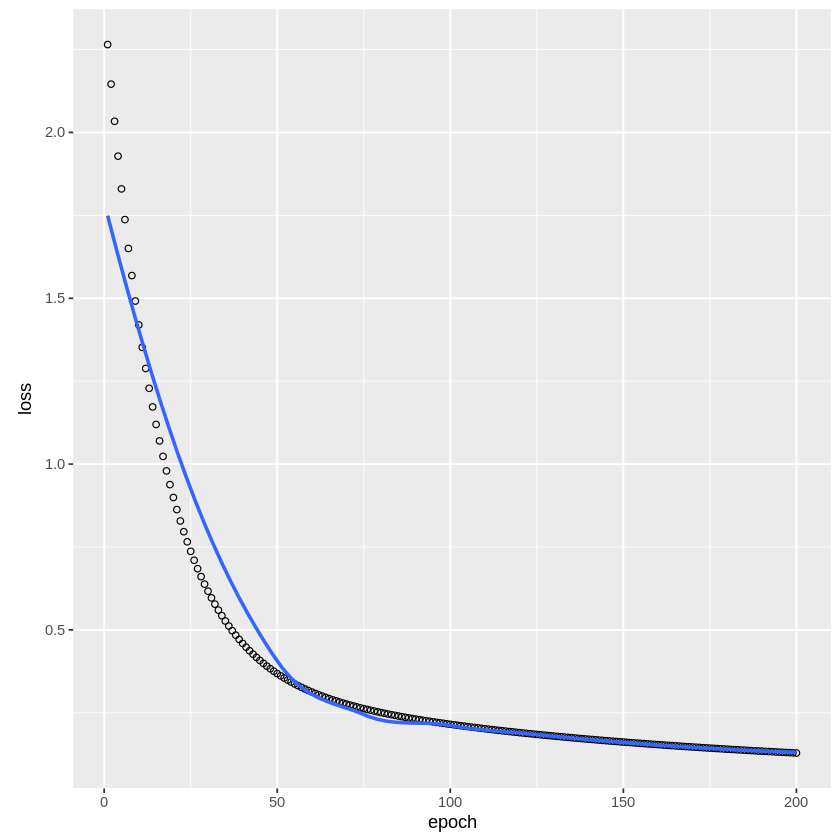

In [10]:
plot(history)

Now we can check our results by doing a **prediction** with our model.
We will use the `round()` function for the *actvation function*. In R, by default it does the Round up.

In [11]:
print(round(predict(model, train_x)))

     [,1]
[1,]    1
[2,]    1
[3,]    1
[4,]    1


Now we can compare with our target variable.

In [12]:
print(train_y)

l1 l2 l3 l4 
 0  1  1  1 
